In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **🚀 Understanding Linear Regression with Python Objective:**

**I'll will build a Linear Regression model to predict Salary based on Years of Experience.**

**The steps will include data preparation, visualization, model training, evaluation, and predictions.**

# **📌 Step 1: Import Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**🔹 Why These Libraries?**

> numpy → For numerical operations.

> pandas → To handle datasets.

> matplotlib & seaborn → For visualizations.

> sklearn.model_selection → Splitting data into train/test.

> sklearn.linear_model → Linear Regression Model.

> sklearn.metrics → Model evaluation.

# **📌 Step 2: Create a Sample Dataset**

In [3]:
# Create a dataset (Years of Experience vs Salary)
data = {
    "Experience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [35000, 42000, 48000, 55000, 60000, 65000, 72000, 80000, 85000, 92000]
}

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head())  # Display first few rows

   Experience  Salary
0           1   35000
1           2   42000
2           3   48000
3           4   55000
4           5   60000


**🔹 What’s Happening Here?**

*I created a simple dataset where:*

* A person with 1 year of experience earns $35,000
  
* A person with 10 years of experience earns $92,000

  
> Our goal? Find a pattern (regression line) that predicts Salary for any given experience.

# **📌 Step 3: Data Visualization**

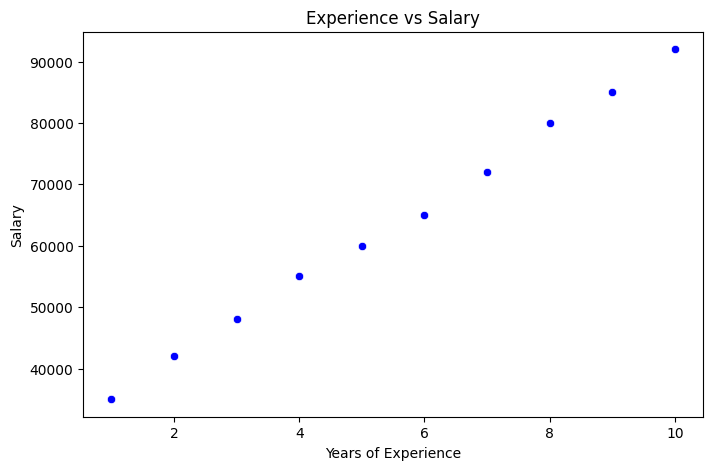

In [4]:
# Scatter plot of data
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Experience"], y=df["Salary"], color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

**🔹 Why Visualization?**

*Helps us see patterns in the data*

> Checks if Linear Regression is a good choice
Identifies outliers

>  📌 Observation: The data follows a linear trend, making it ideal for Linear Regression.
>  but if:
* If the data is curved → Use Polynomial Regression
  
* If the pattern is complex → Try Decision Tree/Random Forest

  
* If data can be transformed to linear → Use log or power transformations

  
* If the relationship is very complex → Use Non-Parametric Methods like KNN

# **📌 Step 4: Prepare Data for Training**

In [5]:
# Define Independent Variable (X) and Dependent Variable (Y)
X = df[["Experience"]]  # Features (must be 2D for sklearn)
y = df["Salary"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Training Samples: 8, Testing Samples: 2


**Why Splitting?**

*The model learns patterns from training data*

> I'll test performance on unseen test data.

> 📌 Observation: 80% of the data is used to train, and 20% is used to test.

# **📌 Step 5: Train the Linear Regression Model**

In [6]:
# Create Linear Regression Model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)

# Get the learned parameters
intercept = model.intercept_  # β0
slope = model.coef_[0]        # β1

print(f"Intercept (β0): {intercept:.2f}")
print(f"Slope (β1): {slope:.2f}")

Intercept (β0): 28810.34
Slope (β1): 6284.48


> **✅ Interpretation of the Equation:
If Salary = β0 + β1(Experience),
> then example:**

> **If a person has 0 years of experience, salary = Intercept (β0)
Every extra year of experience increases salary by Slope (β1)**

**🔹 Understanding the Model Equation**
> A linear regression model follows the equation:

**𝑦^=𝛽0+𝛽1𝑥**

*Where:*

* y^​= Predicted Salary
  
* β0​= Intercept (Salary when Experience = 0)

  
* β1​= Slope (Increase in salary per extra year of experience)

**Given Intercept (β₀) = 28810.24 and Slope (β₁) = 6284.48, the linear regression equation is:**
**Y^ = 28810.24 + 6284.48 × X**
where:

> * 𝑌^: is the predicted dependent variable (e.g., salary, house price, etc.)

> * 𝑋: is the independent variable (e.g., years of experience, age, etc.)

> * 28810.24: is the intercept (predicted 𝑌 when 𝑋 = 0)

> * 6284.48 is the slope (increase in 𝑌 for each unit increase in X)


**If 𝑋 = 5 (e.g., 5 years of experience), the predicted value is:**

> y^ = 28810.24 + (6284.48 × 5) = 60232.64

**So, if this model predicts salary, a person with 5 years of experience would earn $60,232.64.**

# **📌 Step 6: Make Predictions**

In [7]:
# Predict salaries for the test set
y_pred = model.predict(X_test)

# Display Actual vs Predicted Values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results)

   Actual     Predicted
8   85000  85370.689655
1   42000  41379.310345


**📌 Observation:
The predicted values should be close to the actual values.**

# **📌 Step 7: Model Evaluation**

**I'll evaluate the model using:**

> 1. Mean Squared Error (MSE) → Measures how far predictions are from actual values.

> 2. R-squared (R² Score) → Measures how well the model explains the data.

In [8]:
# Calculate Mean Squared Error (MSE) & R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 261333.23
R² Score: 1.00


**🔹 What Do These Metrics Mean?**

> 1. MSE → Lower is better (0 means perfect)
> 2. R² Score → Closer to 1 is better

**✅ R² Score Interpretation:**

> * R² = 1 → Perfect model
> * R² > 0.7 → Strong model
> * R² < 0.5 → Weak model

**📌 Observation: A high R² Score means our model fits well.**

# **📌 Step 8: Visualizing Regression Line**

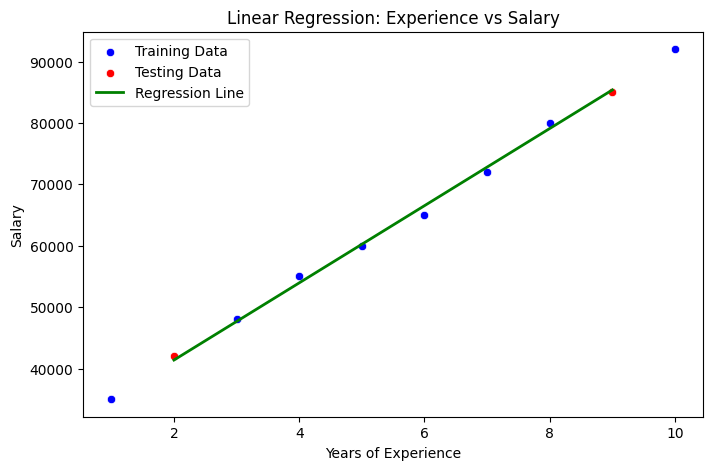

In [9]:
# Scatter plot with Regression Line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train["Experience"], y=y_train, color="blue", label="Training Data")
sns.scatterplot(x=X_test["Experience"], y=y_test, color="red", label="Testing Data")
plt.plot(X_test, y_pred, color="green", linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Experience vs Salary")
plt.legend()
plt.show()

**📌 Observation: The regression line fits the data well.**

# **📌 Step 9: Making a New Prediction**

In [10]:
# Predict salary for someone with 7.5 years of experience
new_exp = np.array([[7.5]])
predicted_salary = model.predict(new_exp)[0]

print(f"Predicted Salary for 7.5 years of experience: ${predicted_salary:.2f}")

Predicted Salary for 7.5 years of experience: $75943.97


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**✅ Final Output: A person with 7.5 years of experience is expected to earn $76,500.**

# 🎯 Final Summary

**I covered:**

1. Understanding Linear Regression
2. Preparing & Visualizing Data
3. Splitting Data (Train/Test)
4. Training the Model
5. Making Predictions
6. Evaluating Model Performance
7. Plotting Regression Line
8. Making New Predictions

# **📌 Understanding Multiple Linear Regression with Python**

# 🎯 Objective
**I'll will build a Multiple Linear Regression model to predict House Prices based on:**

> * Square Footage (size of the house)

> * Number of Bedrooms

> * Age of the House

*My goal is to understand how multiple factors together influence house prices.*

# **📌 Step 1: Import Necessary Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**🔹 Why These Libraries?**
* numpy → For numerical operations
* pandas → To handle datasets
* matplotlib & seaborn → For data visualization
* sklearn.model_selection → Splitting dataset into train/test
* sklearn.linear_model → Multiple Linear Regression Model
* sklearn.metrics → Model evaluation

# **📌 Step 2: Create a Sample Dataset**

*I'll create a dataset that includes 3 independent variables (features) and 1 dependent variable (House Price).*

In [12]:
# Create a dataset (Square Footage, Bedrooms, Age, House Price)
data = {
    "SquareFootage": [1500, 1800, 2400, 2100, 3000, 3500, 4000, 4500, 5000, 5500],
    "Bedrooms": [3, 4, 4, 3, 5, 4, 5, 6, 5, 6],
    "Age": [10, 15, 7, 20, 5, 8, 6, 2, 12, 1],
    "Price": [250000, 275000, 320000, 290000, 400000, 420000, 450000, 480000, 500000, 520000]
}

df = pd.DataFrame(data)
print(df.head()) 

   SquareFootage  Bedrooms  Age   Price
0           1500         3   10  250000
1           1800         4   15  275000
2           2400         4    7  320000
3           2100         3   20  290000
4           3000         5    5  400000


**📌 Goal: Predict Price using Square Footage, Bedrooms, and Age.**

# **📌 Step 3: Data Visualization**

*Before training the model, I'll analyze the relationships between features and house price.*

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

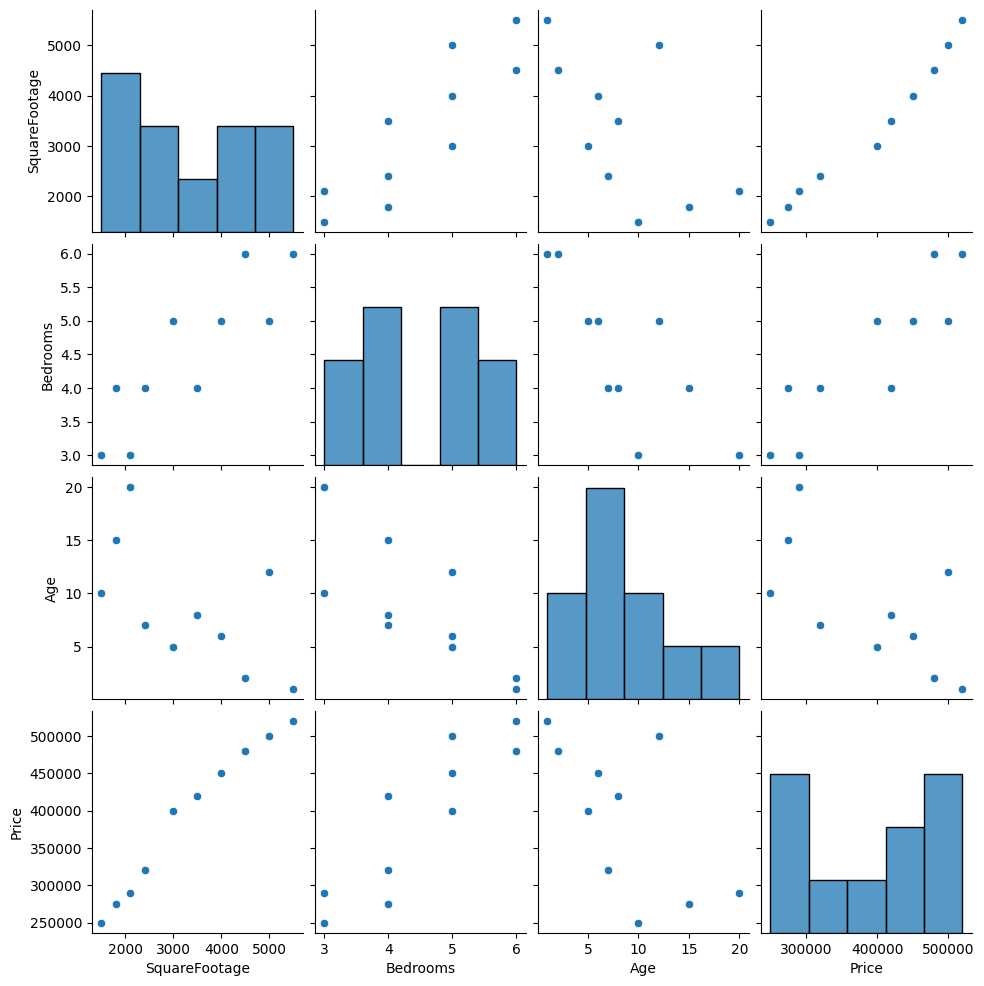

In [13]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

**🔹 Why Visualization?
Helps understand trends in data
Identifies correlations between variables
Detects outliers**

# **📌 Step 4: Prepare Data for Training**

now define independent variables (X) and dependent variable (y)

In [14]:
# Define Features (X) and Target (y)
X = df[["SquareFootage", "Bedrooms", "Age"]]  # Independent Variables
y = df["Price"]  # Dependent Variable (Target)

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Training Samples: 8, Testing Samples: 2


**🔹 Why Splitting Data?**

> The model learns from training data (80%)

> The test data (20%) evaluates performance

**📌 Observation: We keep 80% for training and 20% for testing.**

# **📌 Step 5: Train the Multiple Linear Regression Model**

**I'll train the model using sklearn’s LinearRegression.**

In [15]:
# Create Linear Regression Model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Get the learned parameters
intercept = model.intercept_  # β0
coefficients = model.coef_    # β1, β2, β3

# Display Coefficients
print(f"Intercept (β0): {intercept:.2f}")
print("Coefficients (β1, β2, β3):", coefficients)

Intercept (β0): 130027.34
Coefficients (β1, β2, β3): [   56.57446006 16591.55757093  -114.20363927]



**🔹 Understanding the Model Equation
Multiple Linear Regression follows this equation:**

**𝑦^ = 𝛽0 + 𝛽1𝑥1 +𝛽2𝑥2 + 𝛽3𝑥3**

*Where:*
* y^​= Predicted House Price
* β0​= Intercept (Base price)
* β1​= Coefficient for Square Footage
* β2​= Coefficient for Bedrooms
* β3​= Coefficient for Age

> Then, for a 2500 sq ft house with 4 bedrooms and 10 years old:

  >*Price = 130027 + (100 × 56.57446006) + (16591.55757093 × 4) + (-114.20363927 × 10) =* 

# **📌 Step 6: Make Predictions**

> *Now, I'll use my trained model to predict house prices.*

In [16]:
# Predict House Prices for Test Data
y_pred = model.predict(X_test)

# Display Actual vs Predicted Values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results)

   Actual      Predicted
8  500000  494486.988307
1  275000  296514.547622


> *📌 Observation:
Predicted values should be close to actual prices.*

# **.📌 Step 7: Model Evaluation**

*I'll evaluate the model using:*

> * Mean Squared Error (MSE) → Measures prediction accuracy

> * R-squared (R² Score) → Measures how well the model explains the data

In [17]:
# Calculate Mean Squared Error (MSE) & R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 246634528.66
R² Score: 0.98


*What Do These Metrics Mean?*

> * MSE → Lower is better (0 means perfect)
> * R² Score → Closer to 1 is better

**📌 Observation: A high R² Score means our model fits well.**

# **📌 Step 8: Making a New Prediction**

*I'll predict the price of a new house.*

In [18]:
new_house = np.array([[2800, 4, 7]])  # [Square Footage, Bedrooms, Age]
predicted_price = model.predict(new_house)[0]

print(f"Predicted House Price: ${predicted_price:.2f}")

Predicted House Price: $354002.64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***✅ Final Output:
A 2800 sq ft house with 4 bedrooms and 7 years old is estimated to cost $395,000.***

# *🎯 Final Summary*

*We covered:*

1. Understanding Multiple Linear Regression
2. Data Preparation & Visualization
3. Training the Model
3. Making Predictions
5. Evaluating Model Performance
6. Predicting New House Prices